Stock Market Analysis

Questions Addressed in this :
    1. What was the change in the price over time?
    2. What was the daily return of the sock average?
    3. What was the moving average of the various stocks?
    4. What was the correlation between different stocks' closing price?
    5. What was the correlation between different stocks' daily returns?
    6. How much value do we put at risk by investing in a particular stock?


In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
#to import data from Google finance or Yahoo finance
from pandas.io.data import DataReader 

C:\Users\sri\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [5]:
from datetime import datetime

In [6]:
tech_list = ['AAPL','AMZN','GOOG','MSFT']

In [7]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo', start, end)

In [9]:
AAPL.head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-01-11,98.970001,99.059998,97.339996,98.529999,49739400,96.385500
2016-01-12,100.550003,100.690002,98.839996,99.959999,49154200,97.784376


In [10]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,104.809960,105.722659,104.020675,104.935397,3.756101e+07,103.972307
std,7.743241,7.719003,7.843404,7.800661,1.658232e+07,8.202364
min,90.000000,91.669998,89.470001,90.339996,1.142440e+07,89.394274
25%,97.295000,98.205000,96.617498,97.339996,2.686492e+07,96.083511
50%,105.865002,106.535000,105.165001,105.944999,3.321345e+07,104.920617
75%,111.007501,112.192501,110.269997,111.467499,4.355010e+07,111.022496
max,118.180000,119.430000,117.940002,118.989998,1.333697e+08,118.989998


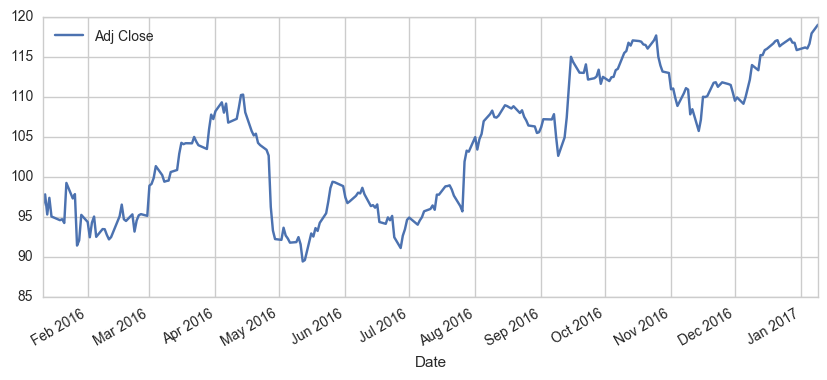

In [11]:
AAPL['Adj Close'].plot(figsize=(10,4), legend=True)

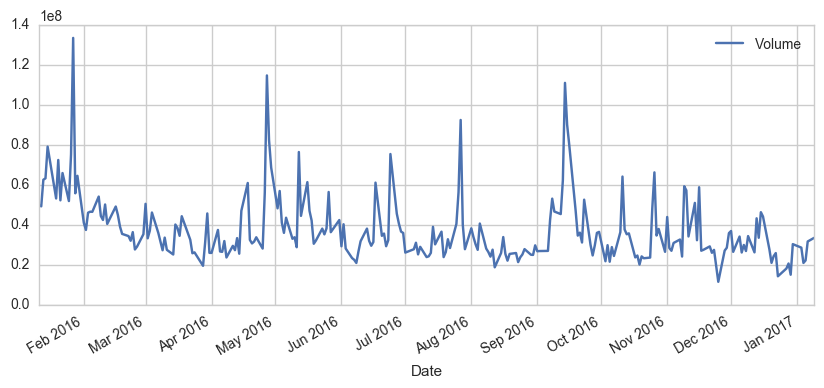

In [12]:
AAPL['Volume'].plot(figsize=(10,4), legend=True)

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

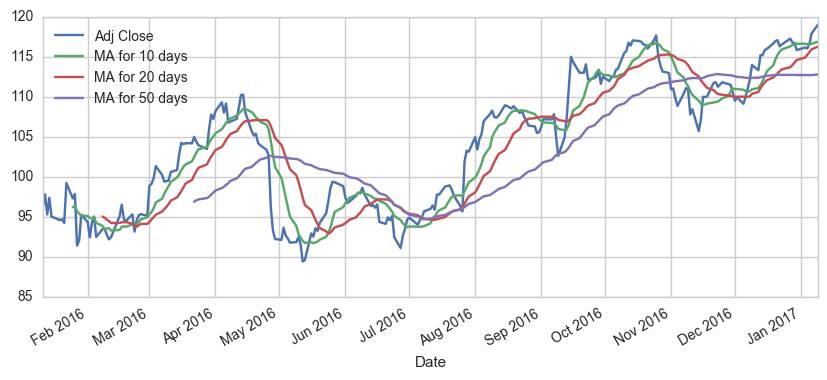

In [16]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,4))

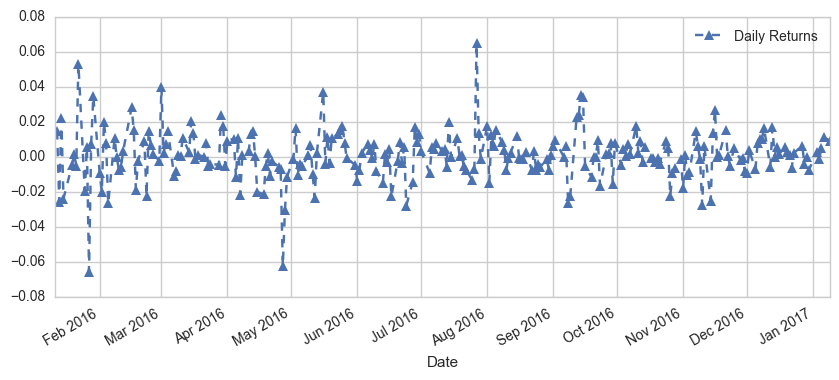

In [17]:
AAPL['Daily Returns'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Returns'].plot(legend=True, figsize=(10,4), linestyle='--', marker='^')

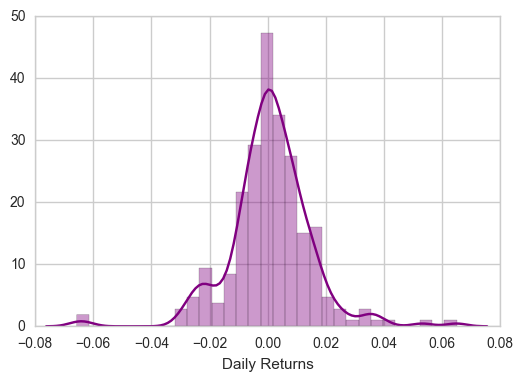

In [18]:
sns.distplot(AAPL['Daily Returns'].dropna(), color='purple', kde=True)

In [19]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [20]:
tech_rets = closing_df.pct_change()

In [21]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-11,NaN,NaN,NaN,NaN
2016-01-12,0.014513,0.000243,0.014022,0.009178
2016-01-13,-0.025710,-0.058392,-0.035134,-0.021599
2016-01-14,0.021871,0.019233,0.020212,0.028466
2016-01-15,-0.024015,-0.038482,-0.028361,-0.039917


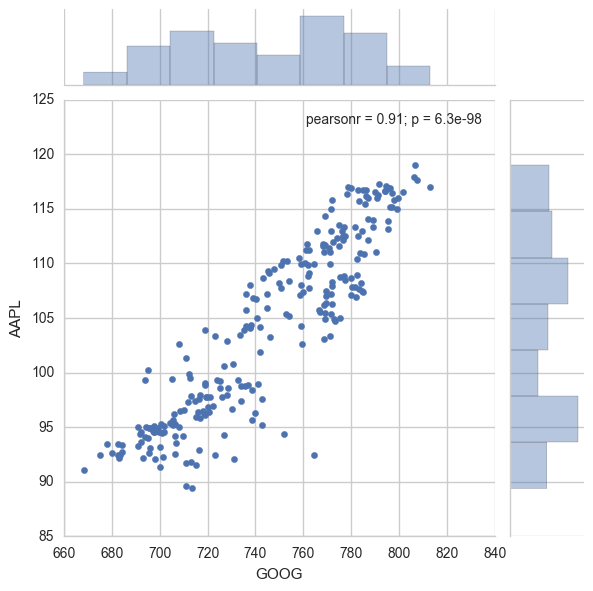

In [22]:
sns.jointplot('GOOG','AAPL',data=closing_df)

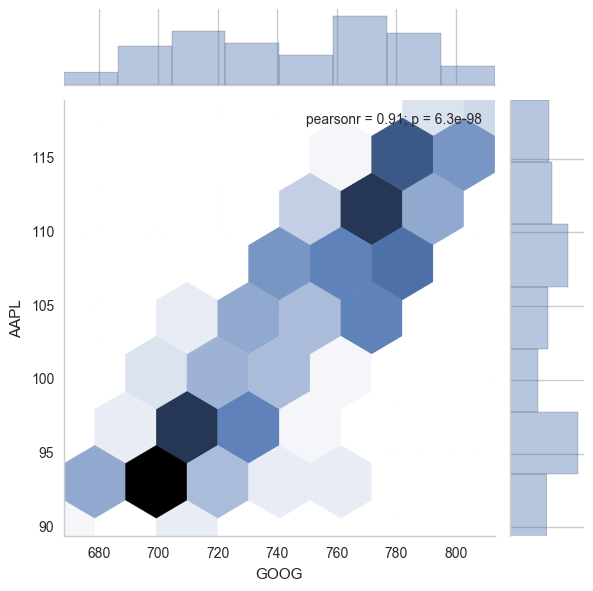

In [23]:
sns.jointplot('GOOG','AAPL',data=closing_df,kind='hex')

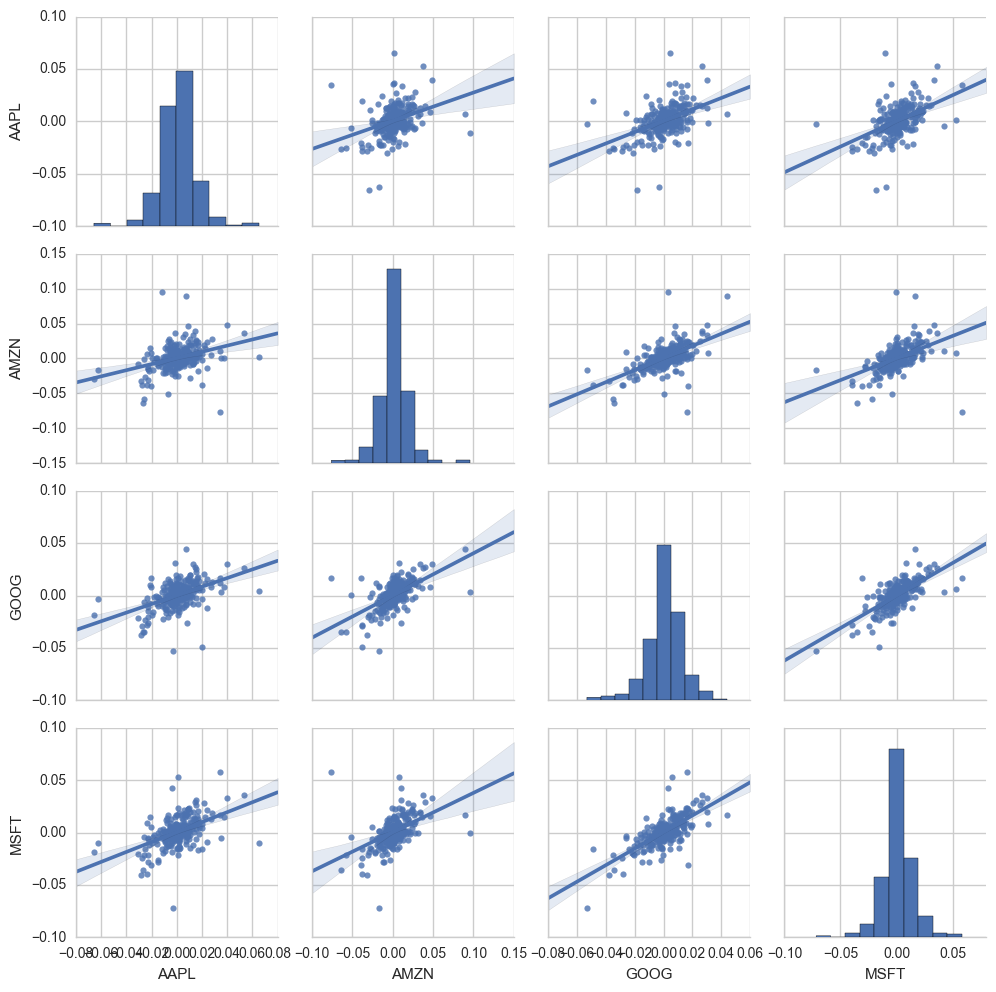

In [24]:
#sns.pairplot(tech_rets.dropna(), palette='Blues',plot_kws=dict(s=10, edgecolor="y"), kind='reg')
sns.pairplot(tech_rets.dropna(), palette='Blues', kind='reg')

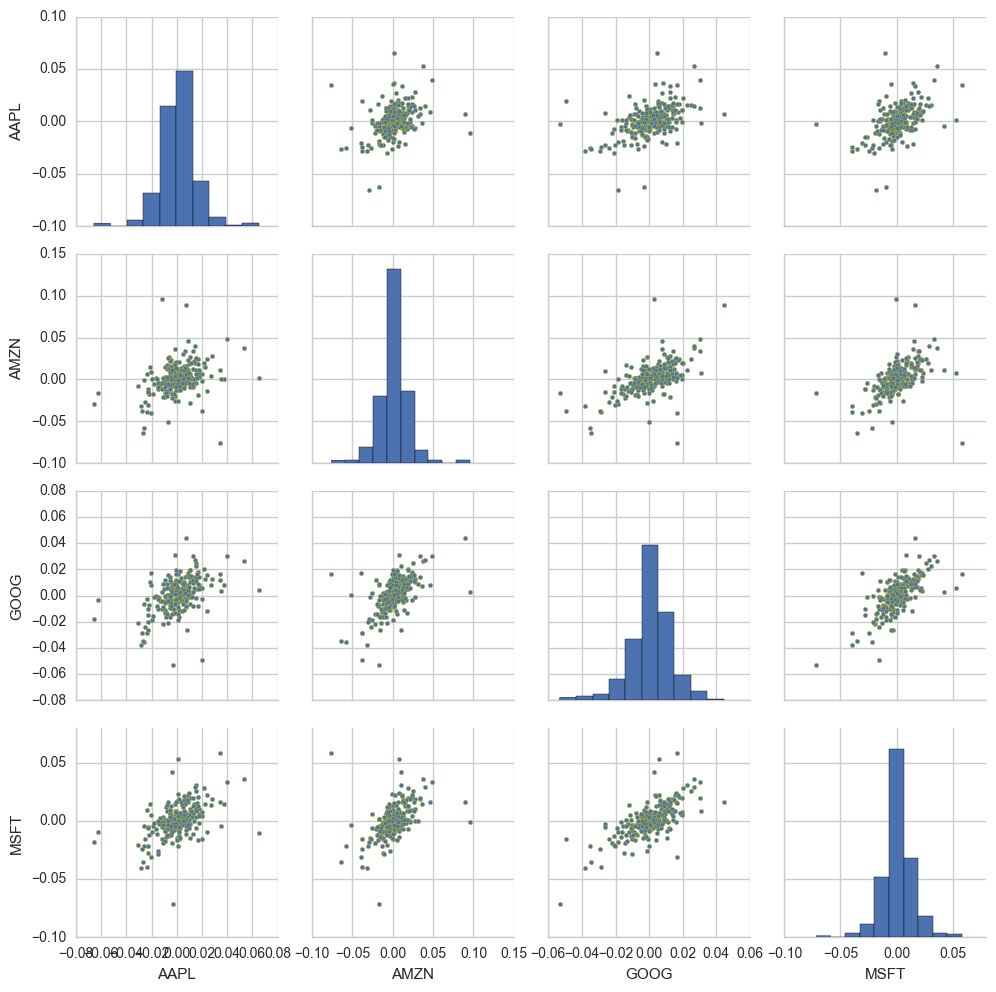

In [25]:
sns.pairplot(tech_rets.dropna(), palette='Blues',plot_kws=dict(s=10, edgecolor="y"))

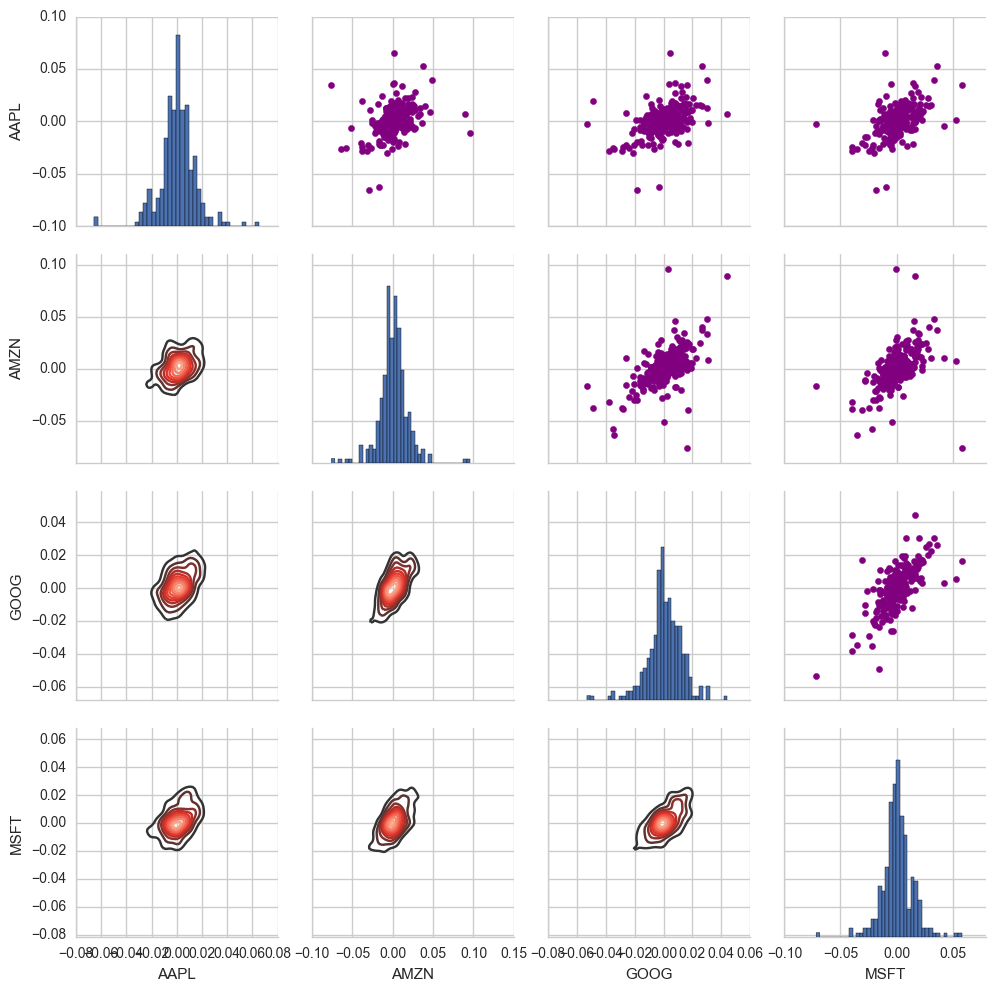

In [26]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='Reds_d')

returns_fig.map_diag(plt.hist, bins=40)

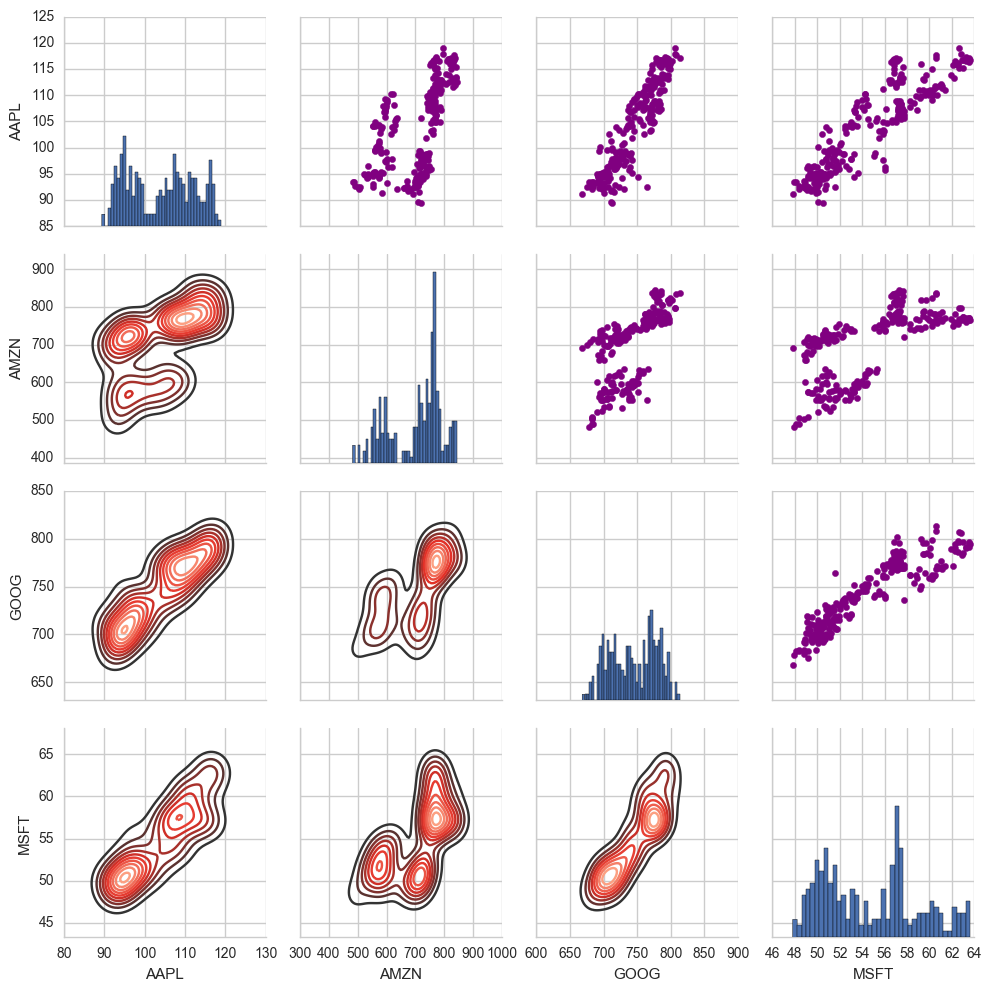

In [27]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='Reds_d')

returns_fig.map_diag(plt.hist, bins=40)

In [28]:
import matplotlib.pyplot as plt

In [29]:
rets = tech_rets.dropna()

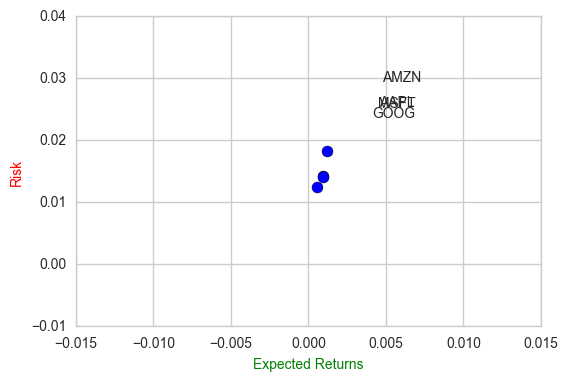

In [52]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel("Expected Returns", fontsize=10, color="green")
plt.ylabel("Risk", fontsize=10, color="red")

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label, xy=(x,y),xytext=(50, 50), textcoords='offset points')
    

0.000941980003032   0.0143209452491
0.00118149558361   0.0183108446427
0.000553008130136   0.012493808281
0.000925885145489   0.014087948128


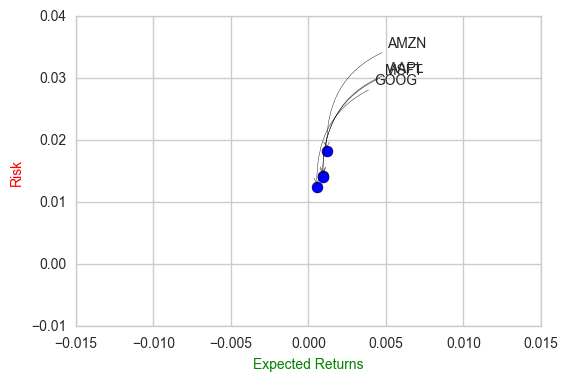

In [78]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel("Expected Returns", fontsize=10, color="green")
plt.ylabel("Risk", fontsize=10, color="red")

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    print(x,' ',y)
    plt.annotate(label, xy=(x,y),xytext=(100, 100), textcoords='offset pixels',ha='right', va='bottom',arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3, rad=0.4"))
    

In [80]:
rets.head(1)

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2016-01-12,0.014513,0.000243,0.014022,0.009178


In [82]:
rets['AAPL'].quantile(0.05)

-0.022627485898497057

In [83]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [93]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in np.arange(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

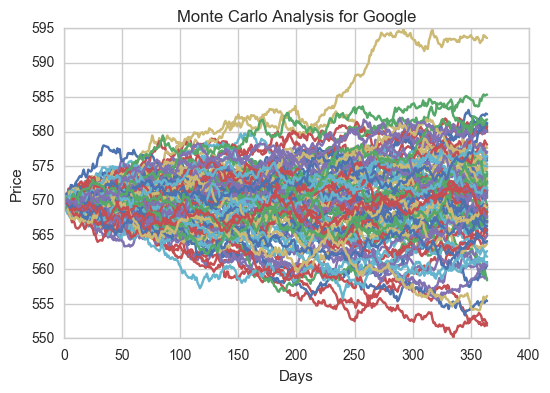

In [94]:
# Get start price from GOOG.head()
start_price = 569.85

for run in np.arange(0,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [96]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in np.arange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

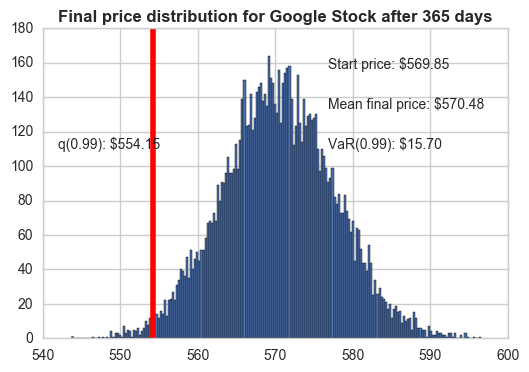

In [97]:
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [ ]:
# END